In [1]:
# make sure images are oriented properly - might need to reach out to Randy Chase to answer this question.


In [2]:
import pickle
import xarray as xr
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bokeh.palettes import Turbo256 as palette


In [3]:
path_file = "/Users/ggantos/PycharmProjects/data/"
filename = "input_examples_20120413.nc"
data_xr = xr.open_dataset(path_file + filename)
data_xr


<xarray.Dataset>
Dimensions:                 (grid_column: 48, grid_row: 48, radar_field: 4, radar_height: 12, sounding_field: 7, sounding_height: 49, storm_object: 672, target_variable: 6)
Dimensions without coordinates: grid_column, grid_row, radar_field, radar_height, sounding_field, sounding_height, storm_object, target_variable
Data variables:
    full_storm_id_strings   (storm_object) |S35 ...
    radar_field_names       (radar_field) |S20 ...
    target_names            (target_variable) |S65 ...
    storm_times_unix_sec    (storm_object) int32 ...
    target_matrix           (storm_object, target_variable) int32 ...
    radar_heights_m_agl     (radar_height) int32 ...
    radar_image_matrix      (storm_object, grid_row, grid_column, radar_height, radar_field) float32 ...
    sounding_field_names    (sounding_field) |S37 ...
    sounding_heights_m_agl  (sounding_height) int32 ...
    sounding_matrix         (storm_object, sounding_height, sounding_field) float32 ...
Attributes:
    rotated_grids:                1
    rotated_grid_spacing_metres:  1500

In [4]:
# xyz and channel (for radar height, start with 1000)
data_xr['radar_image_matrix'].values.shape

(672, 48, 48, 12, 4)

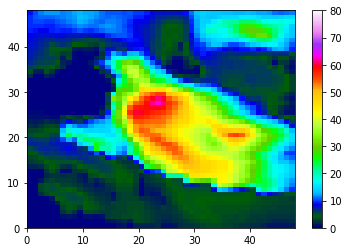

In [5]:
plt.pcolormesh(data_xr['radar_image_matrix'][0, :, :, 0, 0], vmin=0, vmax=80, cmap='gist_ncar')
plt.colorbar()


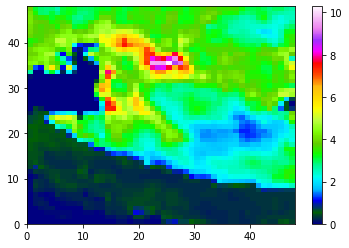

In [6]:
plt.pcolormesh(data_xr['radar_image_matrix'][0, :, :, 0, 1], cmap='gist_ncar')
plt.colorbar()


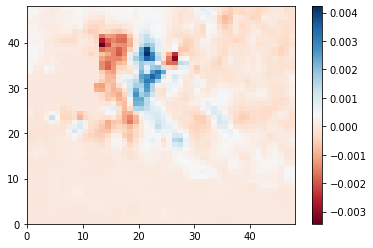

In [7]:
# vorticity

plt.pcolormesh(data_xr['radar_image_matrix'][0, :, :, 0, 2], cmap='RdBu')
plt.colorbar()


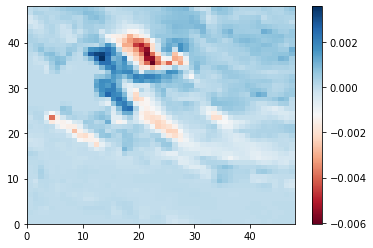

In [8]:
# divergence

plt.pcolormesh(data_xr['radar_image_matrix'][0, :, :, 0, 3], cmap='RdBu')
plt.colorbar()


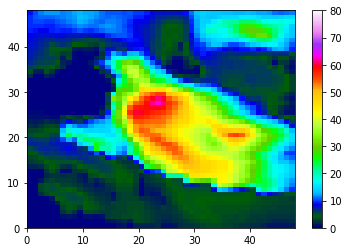

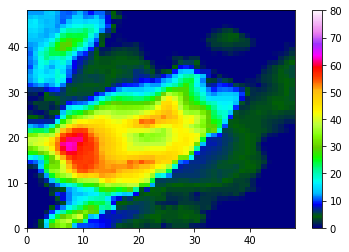

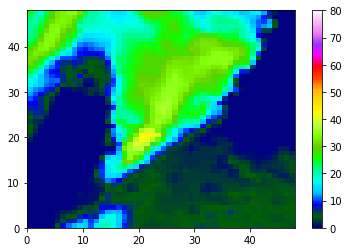

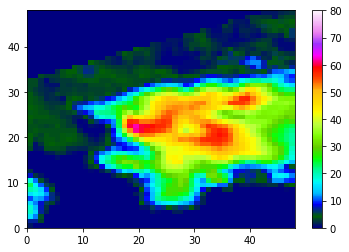

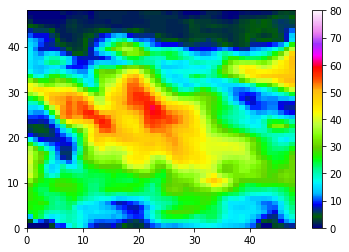

In [9]:

for i in range (5):
    plt.pcolormesh(data_xr['radar_image_matrix'][i, :, :, 0, 0], vmin=0, vmax=80, cmap='gist_ncar')
    plt.colorbar()
    plt.show()


In [10]:
filename = "tornado_labels_20120413.nc"
labels_xr = xr.open_dataset(path_file + filename)
labels_xr


<xarray.Dataset>
Dimensions:                                                            (storm_object: 704)
Dimensions without coordinates: storm_object
Data variables: (12/32)
    full_id_strings                                                    (storm_object) |S25 ...
    valid_times_unix_sec                                               (storm_object) int32 ...
    tornado_lead-time=0000-0900sec_distance=00000-30000m_min-fujita=0  (storm_object) float32 ...
    tornado_lead-time=0000-0900sec_distance=00000-30000m_min-fujita=2  (storm_object) float32 ...
    tornado_lead-time=0000-0900sec_distance=00000-20000m_min-fujita=0  (storm_object) float32 ...
    tornado_lead-time=0000-0900sec_distance=00000-20000m_min-fujita=2  (storm_object) float32 ...
    ...                                                                 ...
    tornado_lead-time=0000-3600sec_distance=00000-30000m_min-fujita=0  (storm_object) float32 ...
    tornado_lead-time=0000-3600sec_distance=00000-30000m_min-fujita=2  (storm_object) float32 ...
    tornado_lead-time=0000-3600sec_distance=00000-20000m_min-fujita=0  (storm_object) float32 ...
    tornado_lead-time=0000-3600sec_distance=00000-20000m_min-fujita=2  (storm_object) float32 ...
    tornado_lead-time=0000-3600sec_distance=00000-10000m_min-fujita=0  (storm_object) float32 ...
    tornado_lead-time=0000-3600sec_distance=00000-10000m_min-fujita=2  (storm_object) float32 ...

In [11]:
for k in data_xr.variables.keys():
    print(k, data_xr.variables[k].shape)

full_storm_id_strings (672,)
radar_field_names (4,)
target_names (6,)
storm_times_unix_sec (672,)
target_matrix (672, 6)
radar_heights_m_agl (12,)
radar_image_matrix (672, 48, 48, 12, 4)
sounding_field_names (7,)
sounding_heights_m_agl (49,)
sounding_matrix (672, 49, 7)


In [12]:
data_xr.full_storm_id_strings


<xarray.DataArray 'full_storm_id_strings' (storm_object: 672)>
array([b'133431840141_133431840173', b'133431840161_133431840197',
       b'133431840084_133431840063', ..., b'133431840103_133431840121',
       b'133431840103_133431840161', b'133431840103_133431840121'],
      dtype='|S35')
Dimensions without coordinates: storm_object

In [13]:
path_storms = "20120413/scale_314159265m2/"
filenames = [f for f in glob.glob(path_file + path_storms + "*.p")]
files = []
for filename in filenames:
    with open(filename, 'rb') as f:
        files.append(pickle.load(f))
data_full = pd.concat(files).sort_index()
data_full


,full_id_string,primary_id_string,secondary_id_string,first_prev_secondary_id_string,second_prev_secondary_id_string,first_next_secondary_id_string,second_next_secondary_id_string,valid_time_unix_sec,spc_date_string,tracking_start_time_unix_sec,...,centroid_latitude_deg,centroid_longitude_deg,east_velocity_m_s01,north_velocity_m_s01,grid_point_latitudes_deg,grid_point_longitudes_deg,grid_point_rows,grid_point_columns,polygon_object_latlng_deg,polygon_object_rowcol
0,133431840000_133431840000,133431840000,133431840000,,,133431840000,,1334343600,20120413,1334343600,...,35.011253,261.801973,9.513400,7.540149,"[35.037600000000005, 35.037600000000005, 35.03...","[261.69520000000006, 261.716, 261.7368, 261.75...","[94, 94, 94, 94, 94, 94, 94, 94, 95, 95, 95, 9...","[105, 106, 107, 108, 109, 110, 111, 112, 105, ...","POLYGON ((261.6848000000001 35.048, 261.684800...","POLYGON ((104.5 93.5, 104.5 95.5, 107.5 95.5, ..."
1,133431840001_133431840001,133431840001,133431840001,,,133431840001,,1334343600,20120413,1334343600,...,34.812960,260.836160,9.470541,6.841852,"[34.85040000000001, 34.85040000000001, 34.8296...","[260.80080000000004, 260.82160000000005, 260.8...","[103, 103, 104, 104, 104, 104, 104, 104, 105, ...","[62, 63, 62, 63, 64, 65, 66, 67, 61, 62, 63, 6...","POLYGON ((260.7904 34.8608, 260.7904 34.8192, ...","POLYGON ((61.5 102.5, 61.5 104.5, 60.5 104.5, ..."
2,133431840002_133431840002,133431840002,133431840002,,,133431840002,,1334343600,20120413,1334343600,...,34.705790,260.586857,9.468920,6.787100,"[34.7464, 34.7464, 34.72560000000001, 34.72560...","[260.55120000000005, 260.6344, 260.57200000000...","[108, 108, 109, 109, 109, 109, 109, 110, 110, ...","[50, 54, 51, 52, 53, 54, 55, 50, 51, 52, 53, 5...","POLYGON ((260.5408 34.75680000000001, 260.5408...","POLYGON ((49.5 107.5, 49.5 110.5, 48.5 110.5, ..."
3,133431840003_133431840003,133431840003,133431840003,,,133431840003,,1334343600,20120413,1334343600,...,35.040720,261.498640,9.444053,7.334638,"[35.07920000000001, 35.07920000000001, 35.0792...","[261.52880000000005, 261.54960000000005, 261.5...","[92, 92, 92, 93, 93, 93, 93, 93, 94, 94, 94, 9...","[97, 98, 99, 95, 96, 97, 98, 99, 93, 94, 95, 9...","POLYGON ((261.5184 35.0896, 261.5184 35.0688, ...","POLYGON ((96.5 91.5, 96.5 92.5, 94.5 92.5, 94...."
4,133431840124_133431840004,133431840124,133431840004,,,133431840004,,1334343600,20120413,1334343600,...,34.962200,261.593800,9.469083,7.380229,"[34.9752, 34.9752, 34.9752, 34.9752, 34.954400...","[261.5704, 261.5912, 261.612, 261.632800000000...","[97, 97, 97, 97, 98, 98, 98, 99]","[99, 100, 101, 102, 99, 100, 101, 99]","POLYGON ((261.5600000000001 34.98560000000001,...","POLYGON ((98.5 96.5, 98.5 99.5, 99.5 99.5, 99...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,133431840214_133431840272,133431840214,133431840272,133431840272,,,,1334386800,20120413,1334343600,...,35.626656,261.853280,13.734253,5.614519,"[35.6824, 35.66160000000001, 35.64080000000000...","[261.92400000000004, 261.92400000000004, 261.7...","[63, 64, 65, 65, 65, 65, 65, 65, 65, 65, 66, 6...","[116, 116, 110, 111, 112, 113, 114, 115, 116, ...","POLYGON ((261.9136 35.69280000000001, 261.9136...","POLYGON ((115.5 62.5, 115.5 64.5, 109.5 64.5, ..."
1736,133431840222_133431840282,133431840222,133431840282,133431840282,,,,1334386800,20120413,1334343600,...,35.876533,262.343467,8.544310,7.546488,"[35.9112, 35.9112, 35.9112, 35.89040000000001,...","[262.34000000000003, 262.36080000000004, 262.3...","[52, 52, 52, 53, 53, 53, 53, 53, 54, 54, 54, 5...","[136, 137, 138, 134, 135, 136, 137, 138, 134, ...","POLYGON ((262.3296 35.92160000000001, 262.3296...","POLYGON ((135.5 51.5, 135.5 52.5, 133.5 52.5, ..."
1737,133431840200_133431840258,133431840200,133431840258,133431840258,,,,1334386800,20120413,1334343600,...,35.797600,262.564000,2.686578,12.414929,"[35.828, 35.828, 35.828, 35.828, 35.828, 35.80...","[262.52720000000005, 262.54800000000006, 262.5...","[56, 56, 56, 56, 56,

In [14]:
data = data_full[['full_id_string', 'valid_time_unix_sec', 'spc_date_string','polygon_object_latlng_deg']]
data

,full_id_string,valid_time_unix_sec,spc_date_string,polygon_object_latlng_deg
0,133431840000_133431840000,1334343600,20120413,"POLYGON ((261.6848000000001 35.048, 261.684800..."
1,133431840001_133431840001,1334343600,20120413,"POLYGON ((260.7904 34.8608, 260.7904 34.8192, ..."
2,133431840002_133431840002,1334343600,20120413,"POLYGON ((260.5408 34.75680000000001, 260.5408..."
3,133431840003_133431840003,1334343600,20120413,"POLYGON ((261.5184 35.0896, 261.5184 35.0688, ..."
4,133431840124_133431840004,1334343600,20120413,"POLYGON ((261.5600000000001 34.98560000000001,..."
...,...,...,...,...
1735,133431840214_133431840272,1334386800,20120413,"POLYGON ((261.9136 35.69280000000001, 261.9136..."
1736,133431840222_133431840282,1334386800,20120413,"POLYGON ((262.3296 35.92160000000001, 262.3296..."
1737,133431840200_133431840258,1334386800,20120413,"POLYGON ((262.5168 35.83840000000001, 262.5168..."
1738,133431840221_133431840281,1334386800,20120413,"POLYGON ((261.2064 36.29600000000001, 261.2064..."


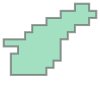

In [15]:
data.loc[data['full_id_string'] == '133431840141_133431840173', 'polygon_object_latlng_deg'][1025]

In [16]:
print(data.loc[data['full_id_string'] == '133431840141_133431840173', 'polygon_object_latlng_deg'][1025])

POLYGON ((260.2496 35.2976, 260.2496 35.2768, 260.208 35.2768, 260.208 35.25600000000001, 260.1664 35.25600000000001, 260.1664 35.23520000000001, 260.1248000000001 35.23520000000001, 260.1248000000001 35.2144, 260.104 35.2144, 260.104 35.1936, 260.0416 35.1936, 260.0416 35.1728, 260.0832 35.1728, 260.0832 35.152, 260.0624 35.152, 260.0624 35.0896, 260.1664 35.0896, 260.1664 35.11040000000001, 260.1872 35.11040000000001, 260.1872 35.13120000000001, 260.208 35.13120000000001, 260.208 35.1936, 260.2288 35.1936, 260.2288 35.2144, 260.2496 35.2144, 260.2496 35.23520000000001, 260.2912 35.23520000000001, 260.2912 35.25600000000001, 260.312 35.25600000000001, 260.312 35.2768, 260.2912 35.2768, 260.2912 35.2976, 260.2496 35.2976))


In [17]:
# reindex full_id_string by each given day
# "radar_image_matrix" == "reflectivity"

In [18]:
def lon_to_web_mercator(lon):
    k = 6378137
    return lon * (k * np.pi / 180.0)

def lat_to_web_mercator(lat):
    k = 6378137
    return np.log(np.tan(((90 + lat) * np.pi / 360.0))) * k


In [19]:
data

,full_id_string,valid_time_unix_sec,spc_date_string,polygon_object_latlng_deg
0,133431840000_133431840000,1334343600,20120413,"POLYGON ((261.6848000000001 35.048, 261.684800..."
1,133431840001_133431840001,1334343600,20120413,"POLYGON ((260.7904 34.8608, 260.7904 34.8192, ..."
2,133431840002_133431840002,1334343600,20120413,"POLYGON ((260.5408 34.75680000000001, 260.5408..."
3,133431840003_133431840003,1334343600,20120413,"POLYGON ((261.5184 35.0896, 261.5184 35.0688, ..."
4,133431840124_133431840004,1334343600,20120413,"POLYGON ((261.5600000000001 34.98560000000001,..."
...,...,...,...,...
1735,133431840214_133431840272,1334386800,20120413,"POLYGON ((261.9136 35.69280000000001, 261.9136..."
1736,133431840222_133431840282,1334386800,20120413,"POLYGON ((262.3296 35.92160000000001, 262.3296..."
1737,133431840200_133431840258,1334386800,20120413,"POLYGON ((262.5168 35.83840000000001, 262.5168..."
1738,133431840221_133431840281,1334386800,20120413,"POLYGON ((261.2064 36.29600000000001, 261.2064..."


In [20]:
xs = []
ys = []
for i in data.index:
    x, y = data.loc[i, 'polygon_object_latlng_deg'].exterior.coords.xy
    xs.append(lon_to_web_mercator(np.array(x) - 360))
    ys.append(lat_to_web_mercator(np.array(y)))
data['x'] = xs
data['y'] = ys
data

<ipython-input-20-d99c60f55949>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x'] = xs
<ipython-input-20-d99c60f55949>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'] = ys


,full_id_string,valid_time_unix_sec,spc_date_string,polygon_object_latlng_deg,x,y
0,133431840000_133431840000,1334343600,20120413,"POLYGON ((261.6848000000001 35.048, 261.684800...","[-10944398.001238845, -10944398.001238845, -10...","[4170406.0670579085, 4164750.912516358, 416475..."
1,133431840001_133431840001,1334343600,20120413,"POLYGON ((260.7904 34.8608, 260.7904 34.8192, ...","[-11043962.15380435, -11043962.15380435, -1104...","[4144980.4734124606, 4139338.209911597, 413933..."
2,133431840002_133431840002,1334343600,20120413,"POLYGON ((260.5408 34.75680000000001, 260.5408...","[-11071747.49870635, -11071747.49870635, -1107...","[4130880.1538311066, 4122428.4872350413, 41224..."
3,133431840003_133431840003,1334343600,20120413,"POLYGON ((261.5184 35.0896, 261.5184 35.0688, ...","[-10962921.564506847, -10962921.564506847, -10...","[4176064.1024901066, 4173234.72429281, 4173234..."
4,133431840124_133431840004,1334343600,20120413,"POLYGON ((261.5600000000001 34.98560000000001,...","[-10958290.673689844, -10958290.673689844, -10...","[4161924.4137321096, 4153449.222475777, 415344..."
...,...,...,...,...,...,...
1735,133431840214_133431840272,1334386800,20120413,"POLYGON ((261.9136 35.69280000000001, 261.9136...","[-10918928.101745347, -10918928.101745347, -10...","[4258433.042252094, 4252732.562183719, 4252732..."
1736,133431840222_133431840282,1334386800,20120413,"POLYGON ((262.3296 35.92160000000001, 262.3296...","[-10872619.193575345, -10872619.193575345, -10...","[4289839.008372963, 4286980.176124209, 4286980..."
1737,133431840200_133431840258,1334386800,20120413,"POLYGON ((262.5168 35.83840000000001, 262.5168...","[-10851780.184898842, -10851780.184898842, -10...","[4278408.183449211, 4275552.351346868, 4275552..."
1738,133431840221_133431840281,1334386800,20120413,"POLYGON ((261.2064 36.29600000000001, 261.2064...","[-10997653.245634349, -10997653.245634349, -10...","[4341427.326712588, 4338554.840209464, 4338554..."


In [21]:
data['valid_time'] = pd.to_datetime(data['valid_time_unix_sec'], unit='s')

<ipython-input-21-d2669dd3d10c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['valid_time'] = pd.to_datetime(data['valid_time_unix_sec'], unit='s')


In [22]:
data['valid_time'].unique()

array(['2012-04-13T19:00:00.000000000', '2012-04-13T19:05:00.000000000',
       '2012-04-13T19:10:00.000000000', '2012-04-13T19:15:00.000000000',
       '2012-04-13T19:20:00.000000000', '2012-04-13T19:25:00.000000000',
       '2012-04-13T19:30:00.000000000', '2012-04-13T19:35:00.000000000',
       '2012-04-13T19:40:00.000000000', '2012-04-13T19:45:00.000000000',
       '2012-04-13T19:50:00.000000000', '2012-04-13T19:55:00.000000000',
       '2012-04-13T20:00:00.000000000', '2012-04-13T20:05:00.000000000',
       '2012-04-13T20:10:00.000000000', '2012-04-13T20:15:00.000000000',
       '2012-04-13T20:20:00.000000000', '2012-04-13T20:25:00.000000000',
       '2012-04-13T20:30:00.000000000', '2012-04-13T20:35:00.000000000',
       '2012-04-13T20:40:00.000000000', '2012-04-13T20:45:00.000000000',
       '2012-04-13T20:50:00.000000000', '2012-04-13T20:55:00.000000000',
       '2012-04-13T21:00:00.000000000', '2012-04-13T21:05:00.000000000',
       '2012-04-13T21:10:00.000000000', '2012-04-13

In [23]:
type(data['valid_time'].unique())

numpy.ndarray

In [24]:
valid_time_menu = np.sort(data['valid_time'].unique())

In [28]:
valid_time_menu[1]

numpy.datetime64('2012-04-13T19:05:00.000000000')

In [26]:
5/60

0.08333333333333333

In [27]:
# gridpoint
# polygon

In [ ]:
# to center the radar data
# pyproj
# select lon=something, lat=something

In [29]:
valid_time_menu[0] + pd.Timedelta("5 min")

Timestamp('2012-04-13 19:05:00')

In [31]:
end = pd.Timestamp(valid_time_menu[-1])


In [36]:
end.minute

0